####  **Professor:  $\;\;\;$Hong Hyung-Woo** 
####  **Student NB: $\;\;\;\;\;\;\;\;\;\;\;$ 20166450** 
####  **Major:           $\;\;\;$ Software Engineering**
####  **Name:         $\;\;\;\;\;\;\;\;\;\;\;$   Kim Young Min**

[Apply K-means algorithm to both image value and its spatial domain]

For a given input image (either gray or color), apply a K-means algorithm that is designed to take into consideration of both the image intensity and its spatial domain with varying parameters: the number of clusters and the trade-off between the intensity energy and the spatial energy.

The objective function is given by:

$\sum_k \sum_\{ x \in I(k) \} [ \| f(x) - m_k \|^2 + a * \| x - c_k \|^2 ]$

where I(k) denotes the index set of x that belongs to cluster k, m_k denotes the centroid of image intensity for cluster k, c_k denotes the centroid of spatial location for cluster k, and a determines the importance between the image intensity and the spatial relation.

- Visualize the clustering results with varying k and a using the centroid color m_k for each cluster k. 

- Visualize the energy curve for both the intensity energy and the spatial energy.

### Start!

In [352]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import *
import numpy as np
import cv2
np.set_printoptions(threshold=10)

### Functions for whitening.

In [353]:
def avg_of_rgb(original_img):
    u=np.array([0.0]*3)
    u=np.sum(original_img,axis=0)/len(original_img)
    return u

def sigma(original_img,u):
    sigma=np.array([0.0]*3)
    for i in range(len(original_img)):
        sigma=np.sum((original_img-u)**2,axis=0)
    sigma=sigma/len(original_img)
    return sigma
    
def whitening(original_img,u,sigma):
    
    whitening_img=np.array([0]*3)
    u=avg_of_rgb(original_img)
    
    sigma=sigma(original_img,u)
    
    whitening_img=(original_img-u)/sigma
    
    return whitening_img
    

### Original image

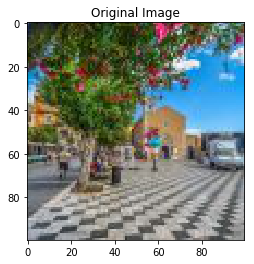

In [372]:
img = cv2.imread('color3.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


r,g,b =cv2. split(img)
r= r.flatten()
g= g.flatten()
b= b.flatten()

plt.subplot(1,1,1)
plt.imshow(img)
plt.title("Original Image")
plt.show()

# For comvenience about getting a clusterimage by K-means algorithms
img_10000=img.reshape(10000,3)
awe=img_10000.reshape(100,100,3)

### Whitening of r,g,b values

In [355]:
whitening_img=whitening(img_10000,u,sigma)
u=avg_of_rgb(img_10000)
sigma=sigma(img_10000,u)
print(whitening_img)

[[-0.01238892 -0.01512736  0.00200521]
 [-0.02852177 -0.03482652 -0.0100728 ]
 [-0.03005823 -0.03670263 -0.0159105 ]
 ...
 [ 0.01603563  0.01442138  0.00764161]
 [ 0.01680386  0.01535944  0.00804421]
 [ 0.01219448  0.0097311   0.00562861]]


### X,Y Coordinate and normalize a=1

In [373]:
rows=np.array([[0]*100]*100)
a=1

for j in range(100):
    for i in range(100):
        rows[j][i]=j

columns=rows.T
rows=rows.reshape(10000)
#rows=normalize(rows)

columns=columns.reshape(10000)
#columns=normalize(columns)

c = np.vstack([rows, columns])
x_y_vector=c.T
x_y_vector=x_y_vector/99
print(x_y_vector)


[[0.         0.        ]
 [0.         0.01010101]
 [0.         0.02020202]
 ...
 [1.         0.97979798]
 [1.         0.98989899]
 [1.         1.        ]]


### Concatenation x_y vector and r,g,b which is already whitened.

In [374]:
add_all = np.hstack([x_y_vector, whitening_img])
print(add_all)

[[ 0.          0.         -0.01238892 -0.01512736  0.00200521]
 [ 0.          0.01010101 -0.02852177 -0.03482652 -0.0100728 ]
 [ 0.          0.02020202 -0.03005823 -0.03670263 -0.0159105 ]
 ...
 [ 1.          0.97979798  0.01603563  0.01442138  0.00764161]
 [ 1.          0.98989899  0.01680386  0.01535944  0.00804421]
 [ 1.          1.          0.01219448  0.0097311   0.00562861]]


### Functions <Distance, Label, Energy, Kmeans_algorithms>

In [375]:
def distance(add_all,init,k):
    d=np.zeros((k,10000))
    for i in range (k):
        d[i]=np.sum((add_all-init[i])**2,axis=1)
    return d


def kmeans_label(d,k):
    label=np.array([0]*10000)
    min_sum=np.min(d,axis=0)
    
    for j in range(len(d.T)):
        for i in range(k):
            if d.T[j][i]==min_sum[j]:
                label[j]=i
    return label


def energy_func(img,avg_image,avg_label):
    ener_sum=0
    for i in range(10000):
        d=(img[i]-avg_image[avg_label[i]])**2
        ener_sum+=np.sum(d)
    
    return(ener_sum)/10000



def Kmeans_algorithm(label,init,add_all,d,k,list_ener):
    
    many=0
    kmeans_vec=np.array([[0.0]*5]*10000)
    label=kmeans_label(d,k)
    avg_label=np.array([0]*(len(add_all)))
    avg_image=np.array([[0.0]*5]*len(init))
    avg_label=np.copy(label)
    
    while(1):
        
        cnt=[0]*len(init)
        label=np.copy(avg_label)
        avg_label=np.array([0]*len(add_all))
        avg_image=np.array([[0.0]*5]*len(init))
        
        for k in range(len(label)):
            avg_image[label[k]]=avg_image[label[k]]+add_all[k]
            cnt[label[k]]+=1
            
        for l in range(len(init)):
            if (cnt[l]!=0):
                avg_image[l]=avg_image[l]/cnt[l]
        
        dis=distance(add_all,avg_image,len(init))
        avg_label=kmeans_label(dis,len(init))
        
        many+=1
        
        if(np.array_equal(label,avg_label)):
            break
        
    
        for i in range(len(label)):
            for j in range(len(init)):
                if (avg_label[i]== j):
                    kmeans_vec[i]= avg_image[j]
                     
        list_ener[many-1]= energy_func(add_all,avg_image,avg_label)
        
    print("Iteration Number:",many)
        
    
                    
    return kmeans_vec



### De_whitening R,G,B value.

In [379]:
def dewhitening(kmeans_color,u,sigma):
    
    de_whitening_img=np.array([0]*3)

    
    de_whitening_img=sigma*kmeans_color+u
    
    return de_whitening_img
    

### k=10

In [424]:
a=1
k=10
init=np.random.random((k,5))
d=distance(add_all,init,k)
label=kmeans_label(d,k)
list_ener10=np.array([0.0]*1000)
kmeans_vec_10=Kmeans_algorithm(label,init,add_all,d,k,list_ener10)

#Cut for kmeans to kmeans_rgb
kmeans_color10=np.array(kmeans_vec_10[:,2:5])
de_whitening_img10=dewhitening(kmeans_color10,u,sigma)
de_whitening_img10=de_whitening_img10.reshape(100,100,3)
de_whitening_img10=de_whitening_img10.astype(np.int64)

Iteration Number: 67


### k=30

In [382]:
a=1
k=30
init=np.random.random((k,5))
d=distance(add_all,init,k)
label=kmeans_label(d,k)
list_ener30=np.array([0.0]*1000)
kmeans_vec_30=Kmeans_algorithm(label,init,add_all,d,k,list_ener30)

#Cut for kmeans to kmeans_rgb
kmeans_color30=np.array(kmeans_vec_30[:,2:5])
de_whitening_img30=dewhitening(kmeans_color30,u,sigma)
de_whitening_img30=de_whitening_img30.reshape(100,100,3)
de_whitening_img30=de_whitening_img30.astype(np.int64)

Iteration Number: 190


### k=50

In [384]:
a=1
k=50
init=np.random.random((k,5))
d=distance(add_all,init,k)
label=kmeans_label(d,k)
list_ener50=np.array([0.0]*1000)
kmeans_vec_50=Kmeans_algorithm(label,init,add_all,d,k,list_ener50)

#Cut for kmeans to kmeans_rgb
kmeans_color50=np.array(kmeans_vec_50[:,2:5])
de_whitening_img50=dewhitening(kmeans_color50,u,sigma)
de_whitening_img50=de_whitening_img50.reshape(100,100,3)
de_whitening_img50=de_whitening_img50.astype(np.int64)

Iteration Number: 282


### k=60

In [401]:
a=1
k=60
init=np.random.random((k,5))
d=distance(add_all,init,k)
label=kmeans_label(d,k)
list_ener60=np.array([0.0]*1000)
kmeans_vec_60=Kmeans_algorithm(label,init,add_all,d,k,list_ener60)

#Cut for kmeans to kmeans_rgb
kmeans_color60=np.array(kmeans_vec_60[:,2:5])
de_whitening_img60=dewhitening(kmeans_color60,u,sigma)
de_whitening_img60=de_whitening_img60.reshape(100,100,3)
de_whitening_img60=de_whitening_img60.astype(np.int64)

Iteration Number: 348


## Visualize the energy curve for both the intensity energy and the spatial energy for each K.

[]

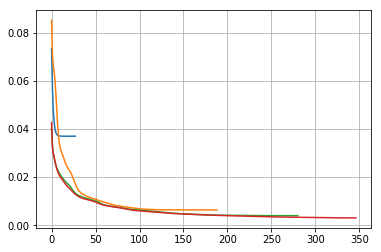

In [420]:
y1=np.copy(list_ener10[:28])
y2=np.copy(list_ener30[:189])
y3=np.copy(list_ener50[:281])
y4=np.copy(list_ener70[:347])
plt.grid()
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)
plt.plot()

## Visualize the clustering results with varying k and a using the centroid color m_k for each cluster k. 

### When k=10

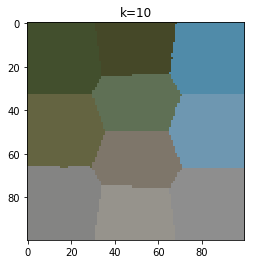

In [425]:
plt.imshow(de_whitening_img10)
plt.title("k=10")
plt.show()

### When k=30

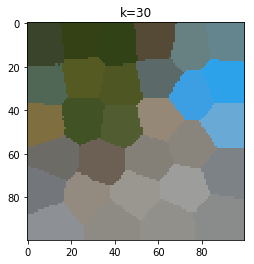

In [426]:
plt.imshow(de_whitening_img30)
plt.title("k=30")
plt.show()

### When k=50

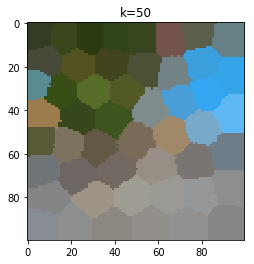

In [427]:
plt.imshow(de_whitening_img50)
plt.title("k=50")
plt.show()

### When k=60

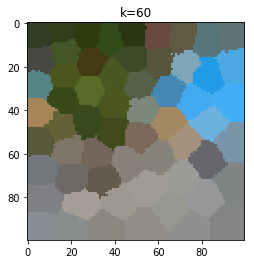

In [428]:
plt.imshow(de_whitening_img60)
plt.title("k=60")
plt.show()

### Original Image.

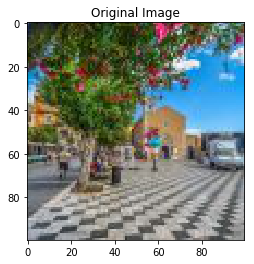

In [422]:
plt.imshow(img)
plt.title("Original Image")
plt.show()